In [1]:
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [3]:
df.shape

(7278, 6)

In [4]:
housing = df[df.district == 'Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [5]:
housing.shape

(1616, 6)

In [ ]:
from sklearn.model_selection import train_test_split 
train_test,test__set = train_test_split(housing,test_size=0.2,random_state=42)

In [7]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()


x_train = np.asanyarray(train_test[['size']])
y_train = np.asanyarray(train_test[['price']])

# Modelni tarbiyalaymiz
LR_model.fit(x_train,y_train)

# theta1 va theta2 koefsientlarini ajratin olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]

print(theta1)
print(theta0)

753.8444656913779
-1009.2734590636028


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'price')

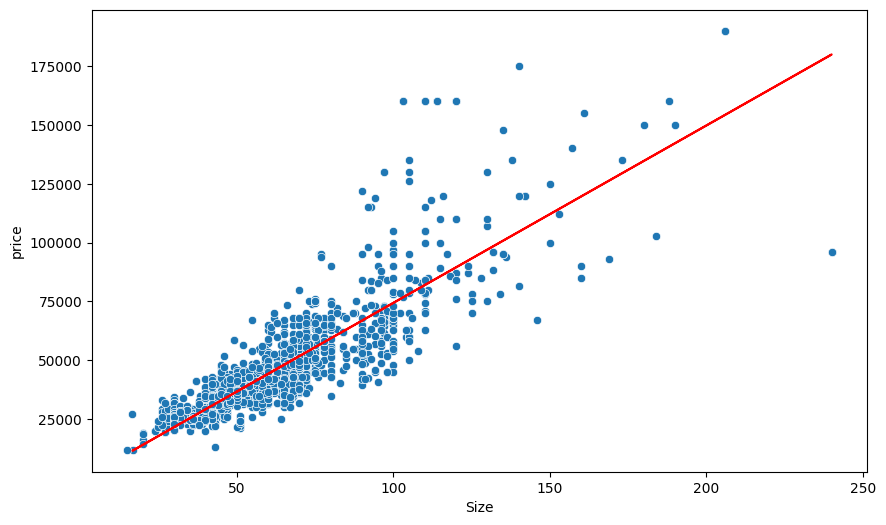

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing,x='size',y='price')
plt.plot(x_train,theta1*x_train+theta0,'-r')
plt.xlabel("Size")
plt.ylabel('price')

# Modelni baholash

In [12]:
x_test = np.asanyarray(test__set[['size']])
y_test = np.asanyarray(test__set[['price']])

In [13]:
y_predict = LR_model.predict(x_test)

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(y_test,y_predict)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict))

print(f"{MAE=}")
print(f"{RMSE=}")

MAE=7796.767463621409
RMSE=np.float64(12812.549962713074)


In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [2]:
df['district'].value_counts()

district
Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: count, dtype: int64

In [3]:
housing = df[df.district == 'Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [4]:
X = housing['size'].to_numpy()
X

array([42., 65., 70., ..., 32., 70., 30.], shape=(1616,))

In [6]:
Y = housing['price'].to_numpy()
Y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.], shape=(1616,))

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


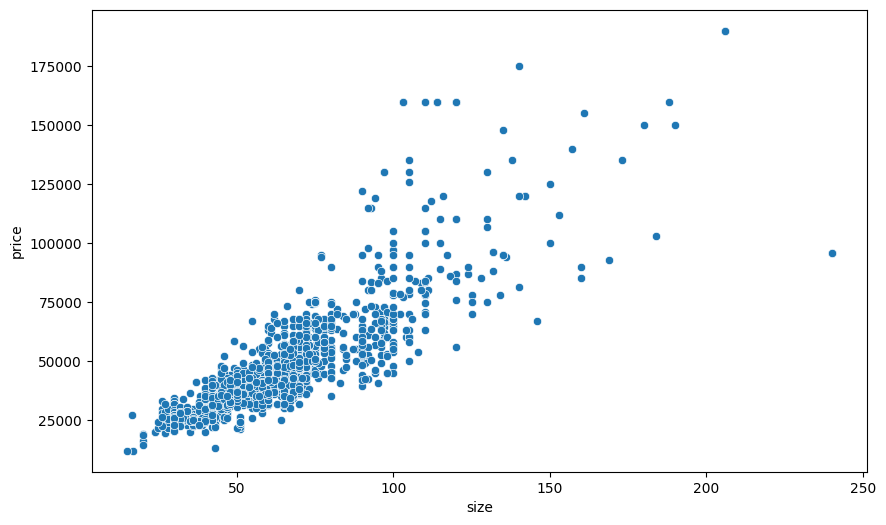

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing,x='size',y='price')
plt.show()

<Axes: xlabel='size', ylabel='price'>

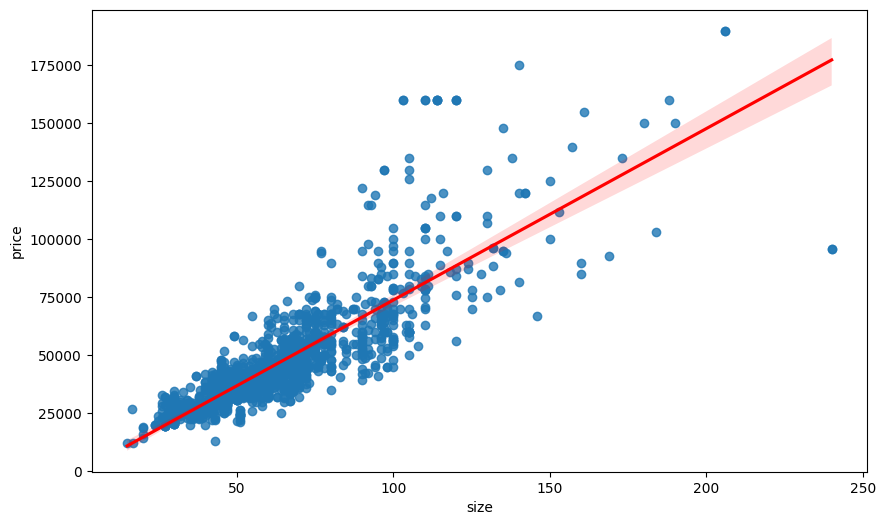

In [14]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing,x='size',y='price',line_kws={'color':'red'})

In [15]:
import numpy  as np

# o'rtacha qiymat

In [ ]:
xmean = np.mean(X)
ymean = np.mean(Y)

In [ ]:
theta1 = np.sum((X-xmean) * (Y-ymean)) / np.sum((X-xmean)**2)

In [ ]:
theta0 = np.sum(ymean - theta1*xmean)

In [29]:
print(theta1)
print(theta0)

740.0264822713249
-195.94911352666531


In [22]:
x_test = housing.sample(10,random_state=42)['size'].to_numpy()
print(x_test)
y_test = housing.sample(10,random_state=42)['price'].to_numpy()
print(y_test)

[54. 42. 36. 60. 48. 68. 38. 65. 52. 44.]
[37500. 26500. 25500. 39000. 32500. 34500. 22700. 47000. 37900. 36000.]


In [24]:
y_predict = theta0 + theta1*x_test
print(f"{y_predict = }")

y_predict = array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])


# xatolik

In [25]:
# MAE
MAE = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
print(f"{MAE = }")

MAE = np.float64(4140.3503163471805)


In [27]:
# RMSE
RMSE = np.sqrt(np.sum((y_predict - y_test) ** 2) / len(y_test))  
print(f"{RMSE = }")

RMSE = np.float64(5882.051673173725)


In [28]:
housing.shape

(1616, 6)

In [51]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

# Liner Regression ML

In [52]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni tarbiyalaymiz
LR_model.fit(x_train,y_train)


theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print(f"{theta1 = }")
print(f"{theta0 = }")

theta1 = np.float64(753.8444656913779)
theta0 = np.float64(-1009.2734590636028)


Text(0, 0.5, 'Price')

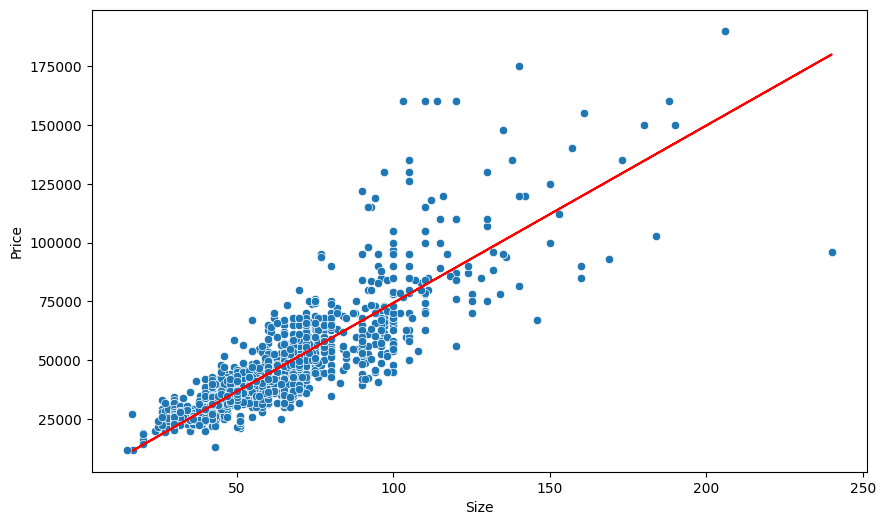

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")

# Modelni baholaymiz

In [53]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [56]:
y_predict = LR_model.predict(x_test)

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(y_test,y_predict)
RMAE = np.sqrt(mean_squared_error(y_test,y_predict))

print(f"{MAE = }")
print(f"{RMAE = }")

MAE = 7796.767463621409
RMAE = np.float64(12812.549962713074)
